In [5]:
import pickle

In [164]:
data_file = "results_5_10_25_individuals.pickle"

In [165]:
convert_dict = {'Best_idx':int,'Best_fitness':float,'Worst_idx':int,'Worst_fitness':float,'Avg_fitness':float,'Best_genome':str}
with open(data_file, 'rb') as handle:
    data = pickle.load(handle)
    for run in data:
        for idx, trial in enumerate(run[1]):
            run[1][idx] = trial.astype(convert_dict)

In [39]:
def get_best_try_of_run(run):
    best_value = None
    best_try = None
    for trial in run[1]:
        new_value = trial.iloc[-1,:]["Best_fitness"]
        if best_try is None or new_value < best_value:
            best_try = trial
            best_value = new_value
    return run[0], best_try

In [111]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

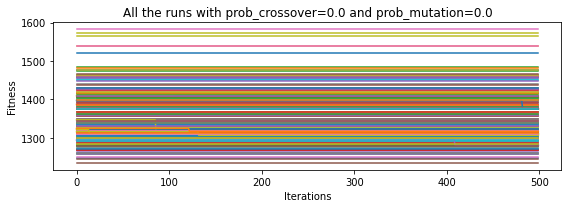

In [166]:
fig, ax = plt.subplots(figsize=[8, 3])
for run in data:
    run_id = run[0]
    if "0.0 0.0" in run_id:
        for trial in run[1]:
            ax.plot(trial["Best_fitness"], label=run_id)
#plt.legend()
#plt.show()
plt.title("All the runs with prob_crossover=0.0 and prob_mutation=0.0")
plt.ylabel("Fitness")
plt.xlabel("Iterations")
plt.tight_layout()
plt.savefig("docs/assets/no_cross_no_mut.pdf", format="pdf")

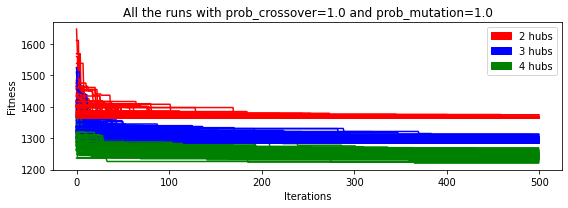

In [167]:
fig, ax = plt.subplots(figsize=[8, 3])
for run in data:
    run_id = run[0]
    if "1.0 1.0" in run_id:
        for trial in run[1]:
            if "2 1.0 1.0" in run_id:
                ax.plot(trial["Best_fitness"], "r-", label=run_id)
                continue
            if "3 1.0 1.0" in run_id:
                ax.plot(trial["Best_fitness"], "b-", label=run_id)
                continue
            if "4 1.0 1.0" in run_id:
                ax.plot(trial["Best_fitness"], "g-", label=run_id)
                continue
#plt.legend()
#plt.show()
plt.title("All the runs with prob_crossover=1.0 and prob_mutation=1.0")
plt.ylabel("Fitness")
plt.xlabel("Iterations")
r_patch = mpatches.Patch(color='red', label='2 hubs')
b_patch = mpatches.Patch(color='blue', label='3 hubs')
g_patch = mpatches.Patch(color='green', label='4 hubs')
plt.legend(handles=[r_patch, b_patch, g_patch])
plt.tight_layout()
plt.savefig("docs/assets/max_cross_mut.pdf", format="pdf")

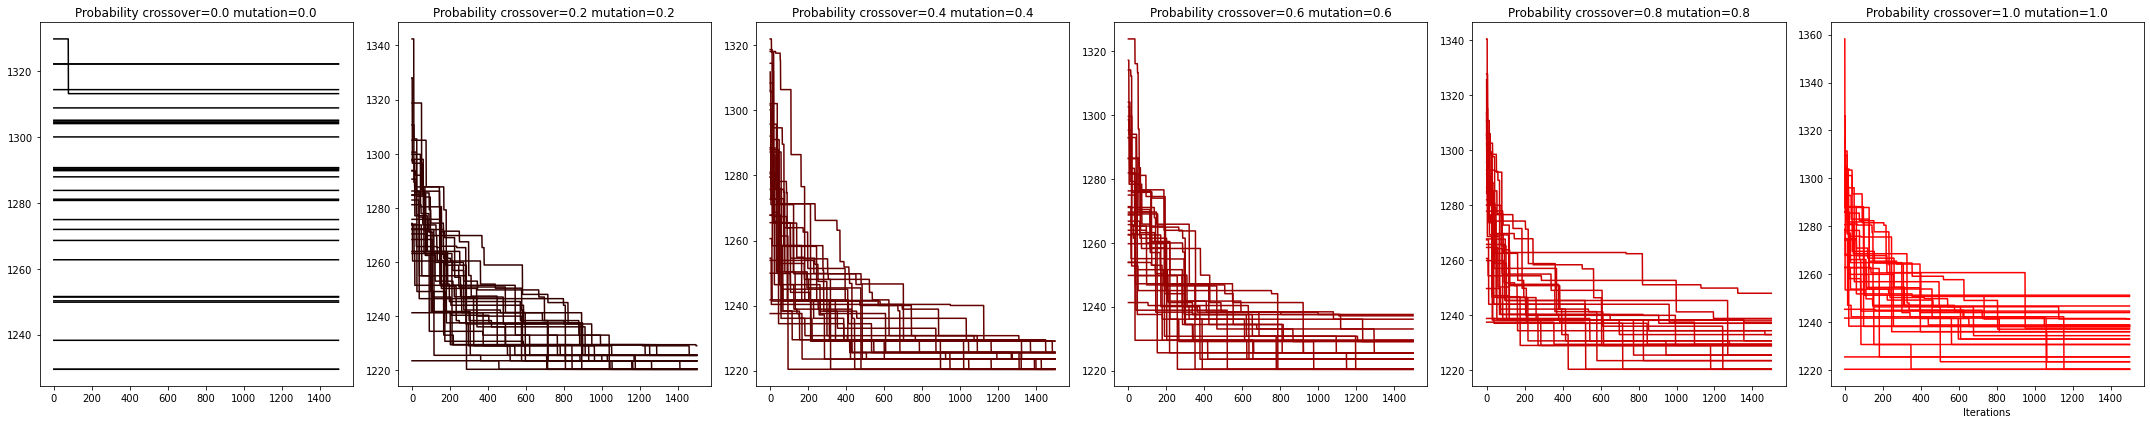

In [214]:
fig, ax = plt.subplots(1, 6, figsize=[30, 6])
for run in data:
    run_id = run[0]
    for trial in run[1]:
        for v in range(0,12,2):
            if f"4 {v/10} {v/10}" in run_id:
                ax[int(v/2)].set_title(f"Probability crossover={v/10} mutation={v/10}")
                ax[int(v/2)].plot(trial["Best_fitness"], c=[v/10,0,0], label=run_id)
                continue
plt.xlabel("Iterations")
plt.tight_layout()
plt.savefig("docs/assets/sweep_values_get_best_fitness.pdf", format="pdf")

In [169]:
data_file = "results_25_individuals.pickle"

In [170]:
convert_dict = {'Best_idx':int,'Best_fitness':float,'Worst_idx':int,'Worst_fitness':float,'Avg_fitness':float,'Best_genome':str}
with open(data_file, 'rb') as handle:
    data = pickle.load(handle)
    for run in data:
        for idx, trial in enumerate(run[1]):
            run[1][idx] = trial.astype(convert_dict)

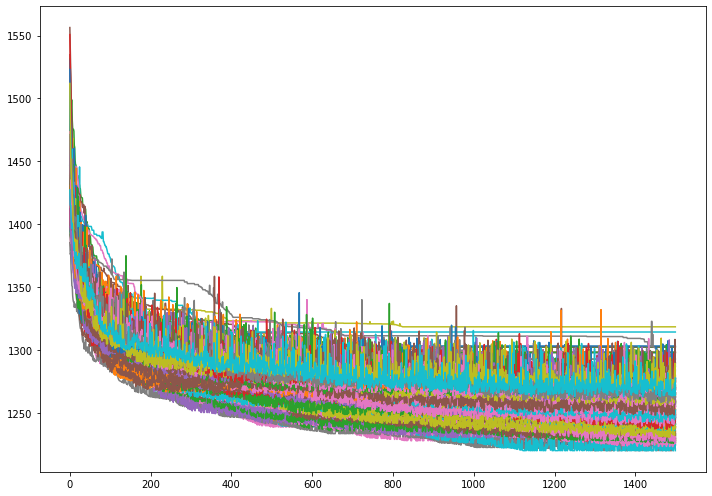

In [185]:
fig, ax = plt.subplots(figsize=[10, 7])
for run in data:
    run_id = run[0]
    for trial in run[1]:
        if "25 4 0.2" in run_id:
            ax.plot(trial["Avg_fitness"], label=run_id)
#plt.legend()
plt.tight_layout()
plt.savefig("docs/assets/all_runs_02.pdf", format="pdf")

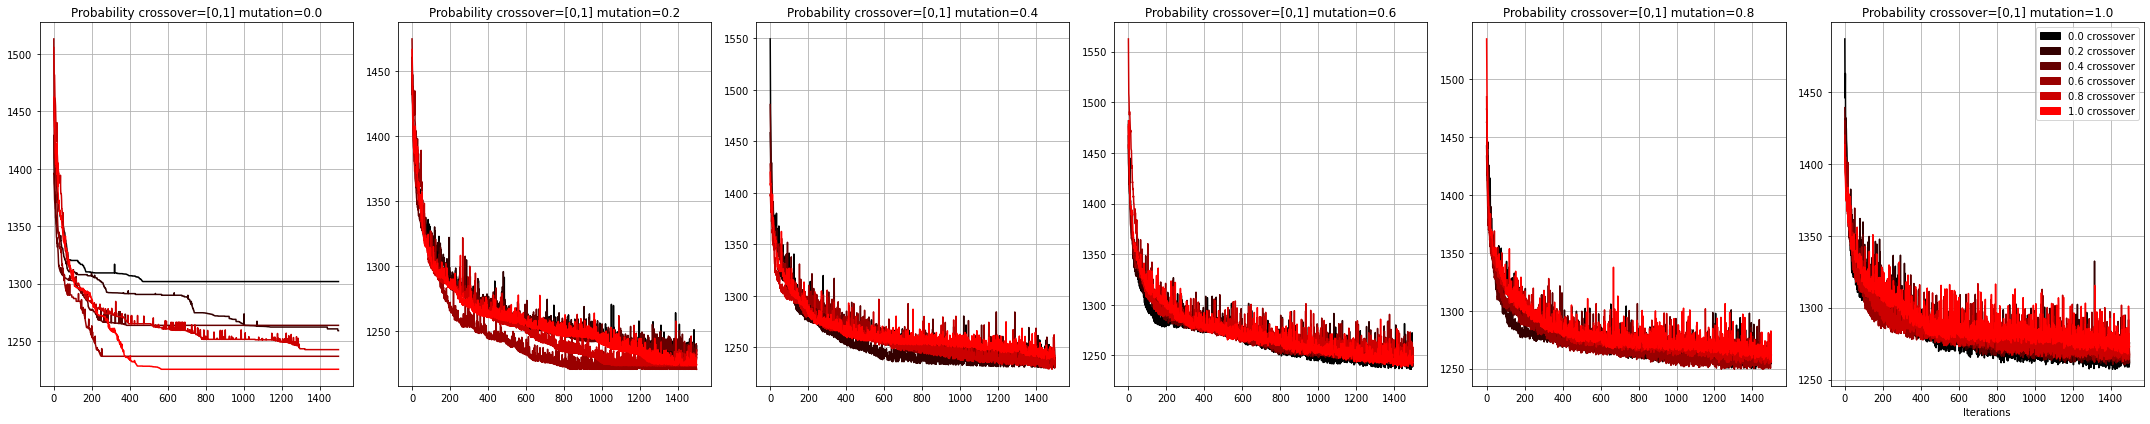

In [223]:
fig, ax = plt.subplots(1, 6, figsize=[30, 6])
for run in data:
    run_id, trial = get_best_try_of_run(run)
    for j in range(0,12,2):
        for v in range(0,12,2):
            if f"4 {j/10} {v/10}" in run_id:
                ax[int(v/2)].set_title(f"Probability crossover=[0,1] mutation={v/10}")
                ax[int(v/2)].plot(trial["Avg_fitness"], c=[j/10,0,0], label=run_id)
plt.xlabel("Iterations")
leg = []
for c in range(0,12,2):
    leg.append(mpatches.Patch(color=[c/10,0,0], label=f'{c/10} crossover'))
    ax[int(c/2)].grid()
plt.legend(handles=leg)
plt.tight_layout()
plt.savefig("docs/assets/sweep_values_get_avg_fitness.pdf", format="pdf")

# When is the optimal solution achieved